# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Dataset**

In [ ]:
dataset = pd.read_csv(r'/content/NBA.csv')

In [ ]:
dataset = dataset.drop(columns=['NAME', 'TEAM','POS'])

In [ ]:
dataset.head()

,RANK,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,30.2,6,41.4,35.7,15.8,78,0.859,94,0.489,...,5.7,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0
1,2,27.8,13,39.8,36.4,9.3,120,0.775,256,0.488,...,7.5,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7
2,3,33.9,4,39.1,31.4,10.0,38,0.974,33,0.424,...,5.0,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7
3,4,25.9,10,39.9,32.3,8.9,81,0.790,187,0.508,...,6.4,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9
4,5,23.6,6,44.6,28.1,8.6,28,0.893,83,0.530,...,6.8,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3


In [ ]:
dataset.shape

(213, 26)

In [ ]:
y = np.array([])
X = np.array([])
# b = 5
# vectorization f = np.dot(w,x) + b

In [ ]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [ ]:
print(f"X Shape: {X.shape}, X Type:{type(X)})")
print(X)
print(f"y Shape: {y.shape}, X Type:{type(y)})")
print(y)

X Shape: (213, 25), X Type:<class 'numpy.ndarray'>)
[[ 30.2   6.   41.4 ...  12.2 117.1 108. ]
 [ 27.8  13.   39.8 ...   9.3 114.8 114.7]
 [ 33.9   4.   39.1 ...   8.2 127.6 115.7]
 ...
 [ 36.    1.    3.6 ...   0.    0.    0. ]
 [ 30.8   3.    3.8 ...   0.    0.    0. ]
 [ 35.3   1.    3.6 ...   0.    0.    0. ]]
y Shape: (213,), X Type:<class 'numpy.ndarray'>)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 15

# **Normalization**

In [ ]:
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()

# **Constant 1 to X matrice**

In [ ]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

# **Beta(Regression coefficients)**

In [ ]:
# Normal equation: (X^T X)^{-1} X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print("Regression coefficients:", beta)


Regression coefficients: [-1.29955193e+01 -2.93902429e-02 -1.44004207e-01 -1.08990437e+00
 -3.31379761e-01  1.12542355e-01  1.32788566e-01 -5.97070855e+00
 -3.37627999e-02 -8.74657640e-01 -2.17054653e-02 -2.10674439e+00
 -1.39988717e+01 -1.19107087e+00 -7.76455775e-01  7.04809150e+00
 -4.62223483e+00 -1.26121033e+00 -9.44957889e-01 -5.09711454e-01
 -7.38648772e+00  6.36347223e+00  3.28822304e-01 -8.03546931e-01
 -5.24023141e-03 -4.45510171e-02]


In [ ]:
y_pred = X @ beta

# **Performance testing**

In [ ]:
# Hata kareleri toplamı (Sum of Squared Errors, SSE)
sse = np.sum((y - y_pred) ** 2)

# Ortalama kare hata (Mean Squared Error, MSE)
mse = sse / len(y)

# R-kare değeri (R-squared value)
sst = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (sse / sst)


In [ ]:
print("Ortalama Kare Hata (MSE):", mse)
print("R-kare Değeri:", r_squared)


Ortalama Kare Hata (MSE): 0.024924236512160847
R-kare Değeri: 0.9750757634878392


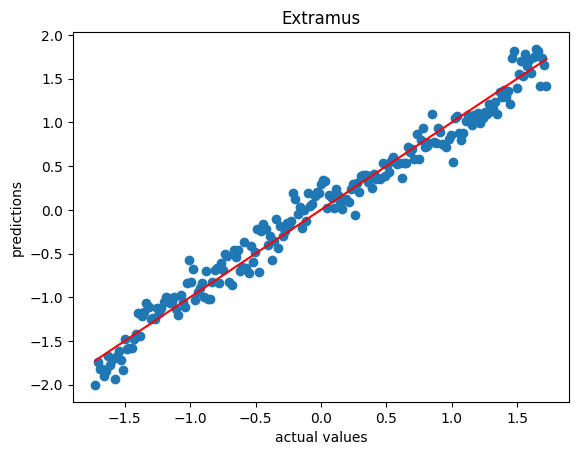

In [ ]:
plt.scatter(y, y_pred)
plt.xlabel('actual values')
plt.ylabel('predictions')
plt.title('Extramus')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Y = X doğrusunu çiz
plt.show()